<a href="https://colab.research.google.com/github/Sean-Reinhardt/Reinhardt-Sean/blob/main/CodingTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 2

- Deadline (upload to Ilias): 2023-05-14 24:00
- Solutions in lecture on 2023-05-17
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples


## Subtasks (maximum 12.5 points)

- Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points] 
- With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]
- Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points] 
- Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

Work in teams and have fun ! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
# from skimage.external.tifffile import TiffFile

import skimage.filters as skf

import skimage.morphology as skm

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# We need to convert the image HEIC formats to something more usual. Stack overflow suggests to use PIL for that. So we installs that.
!pip install pillow_heif 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Task 1: Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them.

In [9]:
import os
from PIL import Image
import pillow_heif


folder_path = '/content/drive/MyDrive/datascience/codingtask2/'

heic_files_found = False # Flag to keep track if any HEIC files are found

for filename in os.listdir(folder_path):
    if filename.endswith('.HEIC'):
        heif_file = pillow_heif.read_heif(folder_path + filename)
        image = Image.frombytes(heif_file.mode, heif_file.size, heif_file.data.tobytes(), "raw")
        
        url_name = filename.split('.')[0] + '.png'
        image.save(folder_path + url_name, format="png")
        
        heic_files_found = True # Set the flag to True if at least one HEIC file is found
    print(url_name)
if not heic_files_found:
    print("No HEIC files found in the specified folder.")

IMG_5383.png
IMG_5384.png
IMG_5385.png
IMG_5386.png
IMG_5381.png
IMG_5382.png
IMG_5390.png
IMG_5392.png
IMG_5393.png
IMG_5379.png
IMG_5380.png
IMG_5388.png
IMG_5389.png
IMG_5387.png
IMG_5387.png
IMG_5387.png
IMG_5387.png
IMG_5387.png
IMG_5387.png
IMG_5387.png
IMG_5387.png
IMG_5387.png
IMG_5387.png
IMG_5387.png
IMG_5387.png
IMG_5387.png
IMG_5387.png
IMG_5387.png


Task 2: With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image.

In [3]:
!pip install pyheif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-37-68c727ffa708>:16: FutureWarning: `selem` is a deprecated argument name for `median`. It will be removed in version 1.0. Please use `footprint` instead.
  image_mean = skf.median(image,selem=skm.disk(20)) #replaces each pixel in an image with the median value of the surrounding pixels.


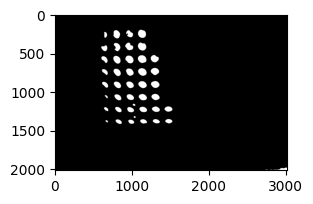

<ipython-input-37-68c727ffa708>:22: UserWarning: /content/drive/MyDrive/datascience/codingtask22/processed_IMG_5383.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(folder_path, "processed_" + os.path.basename(files)), image_threshold)


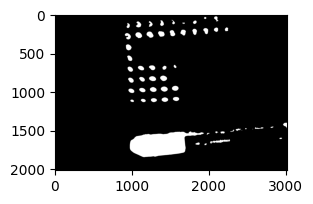

<ipython-input-37-68c727ffa708>:22: UserWarning: /content/drive/MyDrive/datascience/codingtask22/processed_Kopie von IMG_5382.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(folder_path, "processed_" + os.path.basename(files)), image_threshold)


In [37]:
import glob
import os
from PIL import Image
import pillow_heif
from skimage import io


threshold_manual = 60
folder_path = '/content/drive/MyDrive/datascience/codingtask22/'
png_files = glob.glob(os.path.join(folder_path, "*.png"))

for files in png_files:
  imageRGB = io.imread(files) #loads it as a 3-dimensional NumPy array with shape (height, width, channels)
  image = imageRGB[:,:,2] #now contains only the intensity values for the blue channel,
  image = image[image.shape[0]//2:image.shape[0],:]
  image_mean = skf.median(image,selem=skm.disk(20)) #replaces each pixel in an image with the median value of the surrounding pixels.
  image_threshold = image_mean<threshold_manual #pixels with intensity values less than the threshold value are considered as background or noise
  plt.figure(figsize=(3, 3))
  plt.imshow(image_threshold, cmap ='gray')
  plt.show()

  io.imsave(os.path.join(folder_path, "processed_" + os.path.basename(files)), image_threshold)


Task 3: Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google.

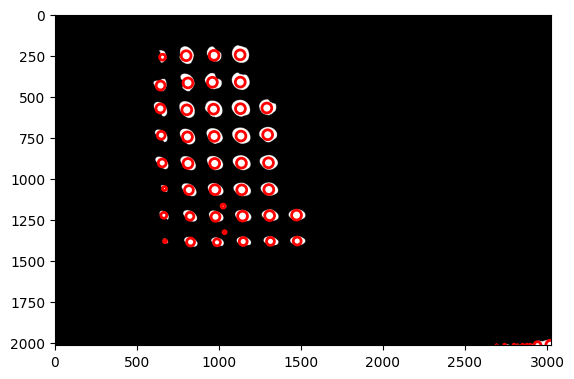

Number of blobs detected: 51


In [59]:
import matplotlib.pyplot as plt
from skimage import io, feature, filters

# Load the image and convert it to grayscale
image = io.imread('/content/drive/MyDrive/datascience/codingtask22/processed_IMG_5383.png', as_gray=True)

# Apply a Gaussian filter to smooth the image
image_smoothed = filters.gaussian(image, sigma=3)

# Detect blobs using the Laplacian of Gaussian method
blobs = feature.blob_log(image_smoothed, min_sigma=3, max_sigma=30, num_sigma=10, threshold=0.1)

# Plot the image and the detected blobs
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')
for blob in blobs:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
plt.show()

#blobs = blob_doh(image_threshold, max_sigma=30, threshold=.01)

print("Number of blobs detected:", len(blobs))

In [50]:
import skimage.io as io
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

threshold_value = 30
folder_path = '/content/drive/MyDrive/datascience/codingtask22/'
png_files = glob.glob(os.path.join(folder_path, "*.png"))

for files in png_files:

# Load the image
  image = io.imread(files)

# Convert the image to binary format
  threshold_value = threshold_otsu(image)
  binary_image = image < threshold_value

# Label the connected white regions in the binary image
  label_image = label(binary_image)

# Get the properties of the labeled regions
  regions = regionprops(label_image)

# Count the number of regions with a minimum number of pixels
  min_pixels = 30
  num_blobs = sum(1 for r in regions if r.area >= min_pixels)

  print(f"Number of blobs: {num_blobs}")

<ipython-input-50-e0021386cf75>:15: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (4032, 3024, 3) looks like that of an RGB image.
  threshold_value = threshold_otsu(image)


Number of blobs: 1009
Number of blobs: 1370
Number of blobs: 0
Number of blobs: 0


Task 4: Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good